Estas gráficas son a realizar sobre el trabajo del tema anterior.

Se debe realizar

1. Gráficas con matplotlib (bien hechas, con título, ejes, etc...)
2. Versión equivalente con Seaborn.

# Gráfica 1

Histórico/evolución de medallas ganadas por España en cada año en un gráfico de línea

* Partiendo del DataFrame **medallas_paises**, columna añadida "total" que sea la suma de las medallas de oro, plata y bronce
* Quédate son los datos solamente de españa en un DF **spain**.
* El DataFrame ya debe estar ordenado por año, por lo que se puede hacer un plot directamente.  
* Si no estuviese ordenado habría que ordenar primero por año, para que la línea no vaya dando saltos
* El eje x es el año 
* El eje y el total de medallas en cada año.

El resultado debe ser como en la imagen, añadiendo nombres a ejes y título de la gráfica.

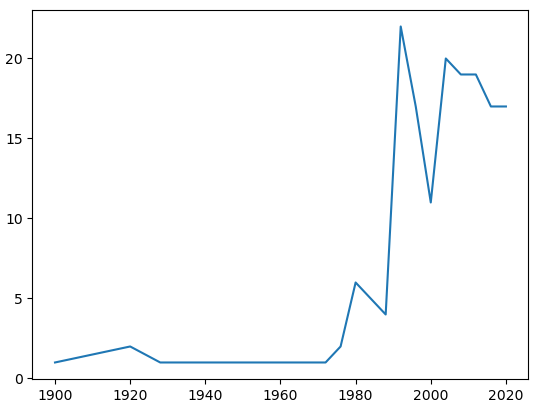

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

medallas_paises = pd.read_csv("medallas_paises.csv", sep='\t')
# 1. Crear columna 'total' y filtrar por España
medallas_paises['total'] = medallas_paises['Oro'] + medallas_paises['Plata'] + medallas_paises['Bronce']
spain = medallas_paises[medallas_paises['Pais'] == 'Spain'].copy()

# 2. Asegurar el orden cronológico para evitar saltos en la línea
spain = spain.sort_values('Anio')



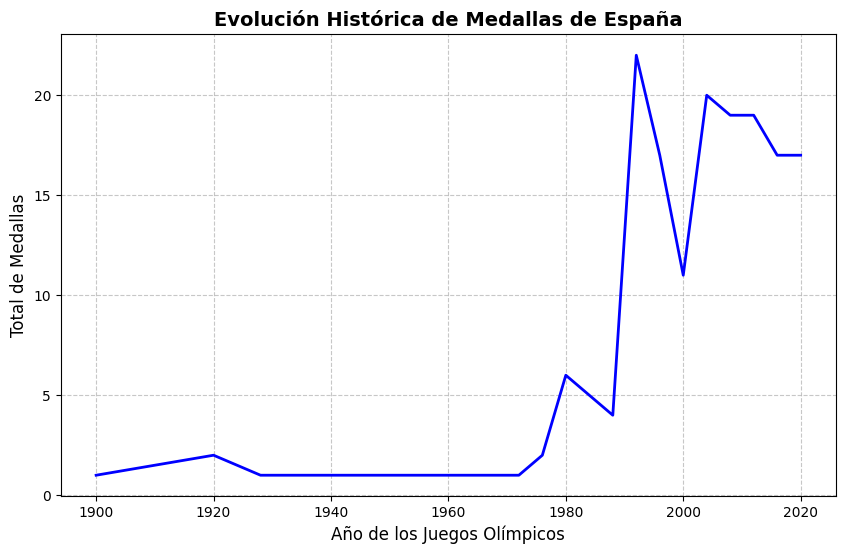

In [5]:
#Matplotlib
plt.figure(figsize=(10, 6))

# Dibujar la línea
plt.plot(spain['Anio'], spain['total'], linestyle='-', color='blue', linewidth=2)

# Personalización
plt.title('Evolución Histórica de Medallas de España', fontsize=14, fontweight='bold')
plt.xlabel('Año de los Juegos Olímpicos', fontsize=12)
plt.ylabel('Total de Medallas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

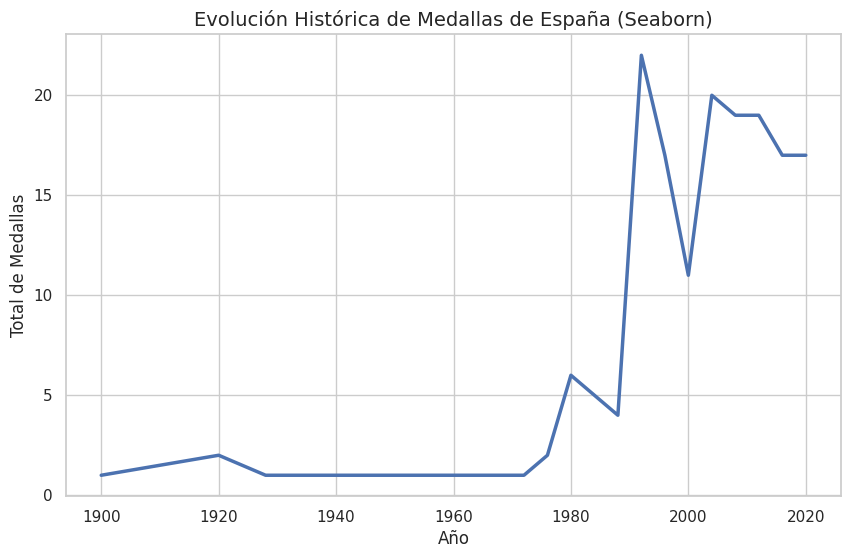

In [6]:
#Seaborn
# Configurar estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de línea
sns.lineplot(data=spain, x='Anio', y='total', color='b', linewidth=2.5)

# Personalización (usando funciones de pyplot para los textos)
plt.title('Evolución Histórica de Medallas de España (Seaborn)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Total de Medallas')

plt.show()

# Gráfica 2

Agrupa por continente y muestra en un gráfico de tartas la distribución del total de medallas por continente de toda la historia. Para ello debes:

* Agrupar por continente y sumar las medallas totales, guardar el agrupamiento en **'total_continente'**
* Se hace un plot de tartas con el total de medallas por contienente
* 'total_continente' es una Serie, el atributo index son los nombres de los continentes, el atributo values son los datos
* En el gráfico se debe ver el % de medallas.

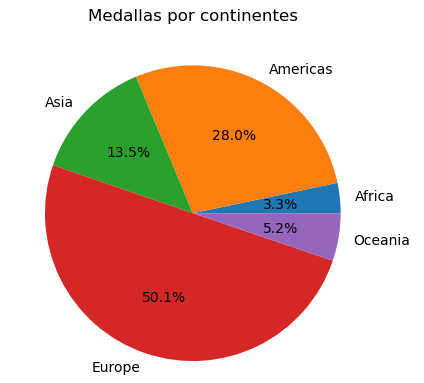

In [7]:
# Agrupar por continente y sumar las medallas totales
total_continente = medallas_paises.groupby('Continente')['total'].sum()

# Mostramos el resultado para verificar
print(total_continente)

Continente
Africa       436
Americas    3704
Asia        1781
Europe      6627
Oceania      689
Name: total, dtype: int64


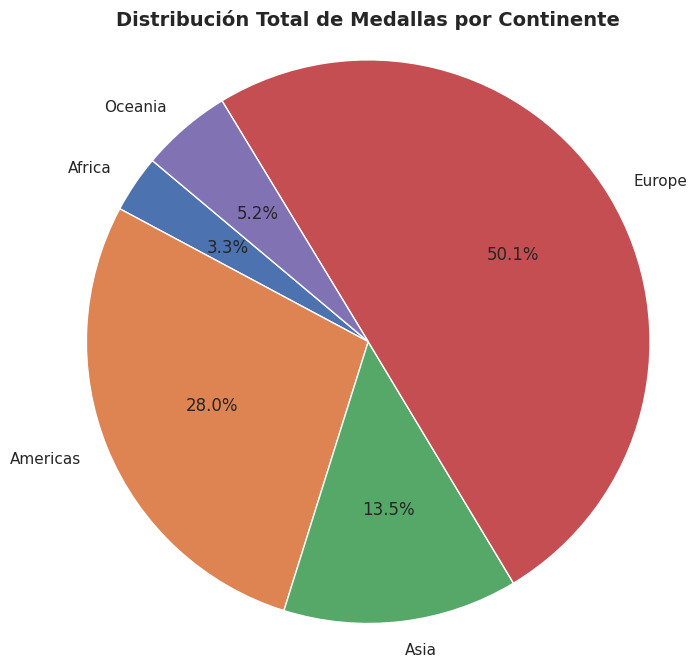

In [8]:
#Matplotlib
plt.figure(figsize=(8, 8))

# Crear el gráfico de tarta
# total_continente.values son los datos, total_continente.index son las etiquetas
plt.pie(total_continente.values, 
        labels=total_continente.index, 
        autopct='%1.1f%%', 
        startangle=140
)

plt.title('Distribución Total de Medallas por Continente', fontsize=14, fontweight='bold')
plt.axis('equal')  # Asegura que el gráfico sea un círculo perfecto

plt.show()

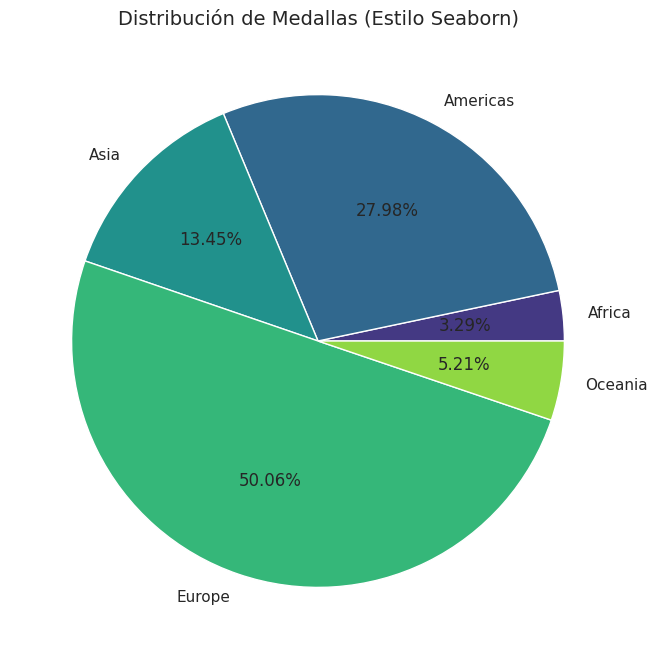

In [9]:
#Seaborn
# Aplicar el contexto visual de Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

# Usar colores de una paleta específica de Seaborn
colors = sns.color_palette('viridis', len(total_continente))

plt.pie(total_continente.values, 
        labels=total_continente.index, 
        autopct='%1.2f%%', 
        colors=colors,
        wedgeprops={'edgecolor': 'white'}) # Añade una línea blanca decorativa

plt.title('Distribución de Medallas (Estilo Seaborn)', fontsize=14)

plt.show()

# Gráfica 3

### Medallas ganadas por España en cada década

A partir del DF **spain**, agrupa las medallas de españa por década y muestra en un gráfico de barras la evolución de medallas totales por década.

Para ello debes hacer:

* Podemos usar cut para discretizar la columna año a  intervalos por décadas, creando una nueva columna **década** en el DF **spain**
* Al hacer cut, los bins (cortes para discretizar) serán los años [1960, 1970, 1980, 1990, 2000, 2010, 2020]
* Las labels serán string que indican cada década ['60s', '70s', '80s', '90s', '00s', '10s']
* Posteriormente, se agrupa por década y se suman las medallas totales, guardando en un nuevo dataframe espana_decadas

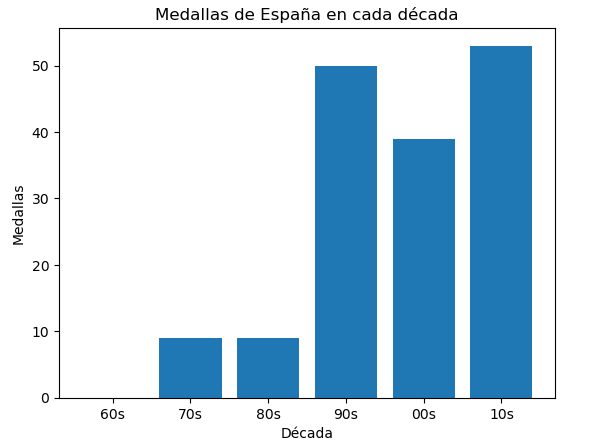


In [10]:
import pandas as pd

# 1. Definir los cortes y las etiquetas
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['60s', '70s', '80s', '90s', '00s', '10s']

# 2. Crear la columna 'década' usando cut
spain['decada'] = pd.cut(spain['Anio'], bins=bins, labels=labels, right=False)

# 3. Agrupar por década y sumar medallas totales
# Usamos as_index=False para que 'decada' siga siendo una columna fácil de graficar
espana_decadas = spain.groupby('decada', observed=True)['total'].sum().reset_index()

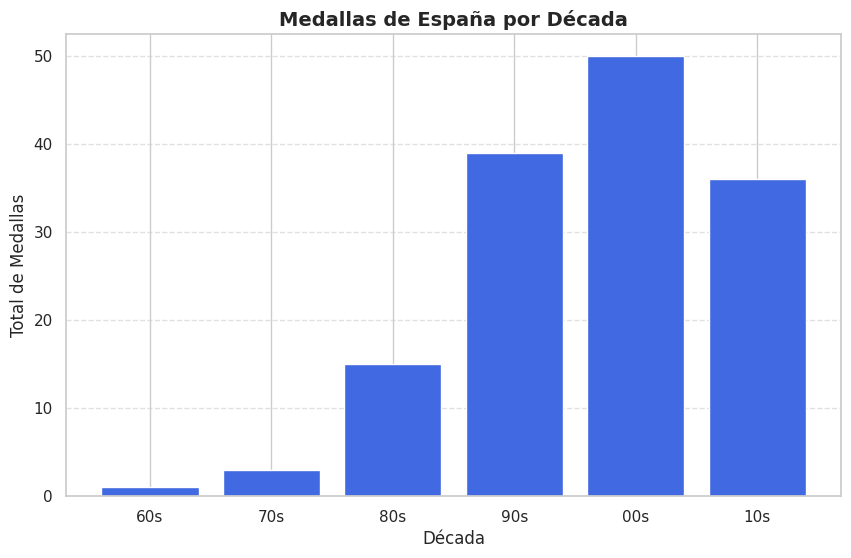

In [ ]:
#Matplotlib
plt.figure(figsize=(10, 6))

# Crear barras
plt.bar(espana_decadas['decada'], espana_decadas['total'], color='blue')

# Personalización
plt.title('Medallas de España por Década', fontsize=14, fontweight='bold')
plt.xlabel('Década', fontsize=12)
plt.ylabel('Total de Medallas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

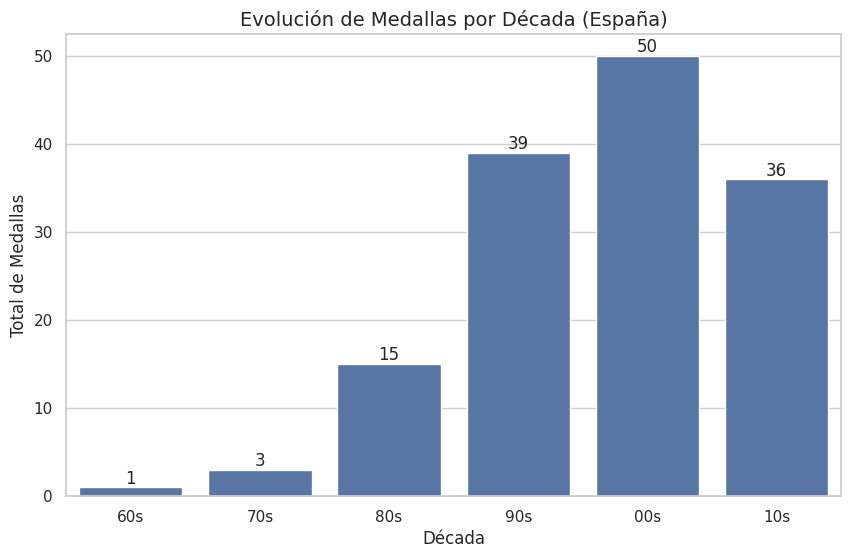

In [12]:
#Seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras
ax = sns.barplot(data=espana_decadas, x='decada', y='total')

# Añadir títulos
plt.title('Evolución de Medallas por Década (España)', fontsize=14)
plt.xlabel('Década')
plt.ylabel('Total de Medallas')

# Opcional: Añadir el número total sobre cada barra
for i in ax.containers:
    ax.bar_label(i)

plt.show()